In [1]:
import pandas as pd
import numpy as np
import math
import logging
import importlib

import sys
import os

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [105]:
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data.load_data import load_data
from data.split_data import split_data
from data.clean_data import DataCleaner
from data.string_toInt_encoder import StringToIntEncoder
from data.oversample_minority import OversampleMinority
from data.undersample_majority import UndersampleMajority
from data.featur_target_pipline import FeatureTargetPipeline
from data.target_binarizer import TargetBinarizer
from data.dummies_encoder import SafeOneHotEncoder
from data.artist_popularity import ArtistPopularityEncoder
from data.balance_simpler import BalancedResampler


BalancedResampler


from predict.acuuracy import ModelEvaluator

from train.train_oversampler import TrainTimeOversamplingWrapper

import data.load_data
import data.split_data
import data.clean_data
import data.string_toInt_encoder
import data.oversample_minority
import data.undersample_majority
import data.featur_target_pipline
import data.dummies_encoder
import data.artist_popularity
import data.balance_simpler

import predict.acuuracy

import train.train_oversampler

importlib.reload(data.load_data)
importlib.reload(data.split_data)
importlib.reload(data.clean_data)
importlib.reload(data.string_toInt_encoder)
importlib.reload(data.oversample_minority)
importlib.reload(data.undersample_majority)
importlib.reload(data.dummies_encoder)
importlib.reload(data.featur_target_pipline)
importlib.reload(data.target_binarizer)
importlib.reload(data.artist_popularity)
importlib.reload(data.balance_simpler)


importlib.reload(predict.acuuracy)

importlib.reload(train.train_oversampler)


<module 'train.train_oversampler' from '/Users/level3/mlops_spotify/spotify-1million/src/train/train_oversampler.py'>

In [79]:
data_folder = './data'
df = load_data(data_folder)


Loading data...
Dataset URL: https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks
Download complete.
Loading CSV data...
Data loaded successfully.


In [93]:
df

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [80]:
data_folder = './data'
# Load the data using the load_data function
df = load_data(data_folder)

Loading data...
Dataset URL: https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks
Download complete.
Loading CSV data...
Data loaded successfully.


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

target = df['popularity']
y = TargetBinarizer(threshold=50).fit_transform(target)
X = df.drop(columns='popularity')

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linea

Running evaluation...

Accuracy: 0.7348

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84    165935
           1       0.12      0.76      0.21      8030

    accuracy                           0.73    173965
   macro avg       0.55      0.75      0.52    173965
weighted avg       0.94      0.73      0.81    173965



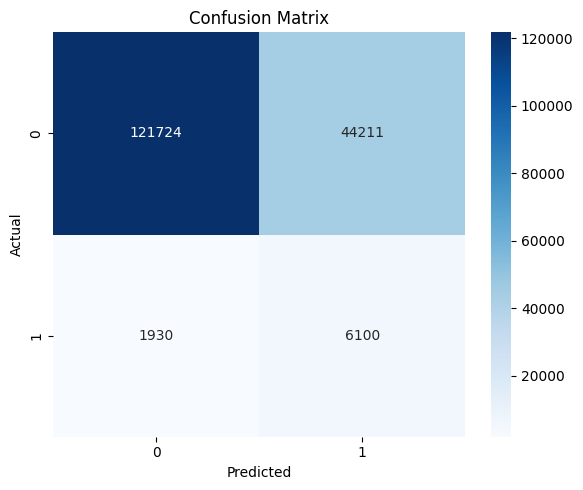

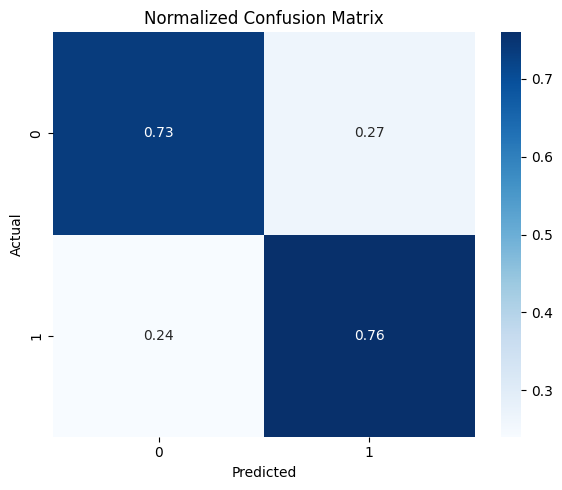

In [88]:
# Just feature preprocessing pipeline (only operates on X)
feature_pipeline = Pipeline([
    ('artist_encoder', ArtistPopularityEncoder()),
    ("data_cleaner", DataCleaner()),
    ('encoder', SafeOneHotEncoder(columns=['genre', 'key', 'time_signature'])),
])

# Full pipeline with model
full_pipeline = Pipeline([
    ("preprocessing", feature_pipeline),
    ("classifier", LogisticRegression(class_weight='balanced', random_state=42))
])

# Now split and binarize target

full_pipeline.fit(X_train, y_train)

evaluator = ModelEvaluator(full_pipeline, X_val, y_val)
evaluator.evaluate()

In [108]:
X_train_preprocessed

,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
163904,2015,0.324,0.071100,-23.476,0,0.0364,0.98500,0.857000,0.0925,0.0426,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
808061,2004,0.717,0.640000,-5.926,1,0.0311,0.11600,0.000753,0.1010,0.4140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22746,2012,0.791,0.477000,-7.980,0,0.0597,0.18200,0.011600,0.1090,0.6670,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
768444,2003,0.909,0.542000,-2.537,1,0.0937,0.02880,0.000775,0.0599,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
361339,2018,0.000,0.000238,-18.388,0,0.0000,0.96200,0.771000,0.1310,0.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216381,2016,0.169,0.491000,-10.191,1,0.0377,0.06180,0.374000,0.1080,0.0711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25488,2012,0.465,0.834000,-5.390,0,0.2140,0.09920,0.000101,0.0878,0.3070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
840275,2005,0.222,0.147000,-11.941,0,0.0396,0.00356,0.973000,0.1060,0.1380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
645125,2000,0.714,0.887000,-5.419,1,0.2940,0.03690,0.110000,0.0503,0.8700,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linea

Running evaluation...

Accuracy: 0.7707

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87    165935
           1       0.08      0.41      0.14      8030

    accuracy                           0.77    173965
   macro avg       0.52      0.60      0.50    173965
weighted avg       0.92      0.77      0.83    173965



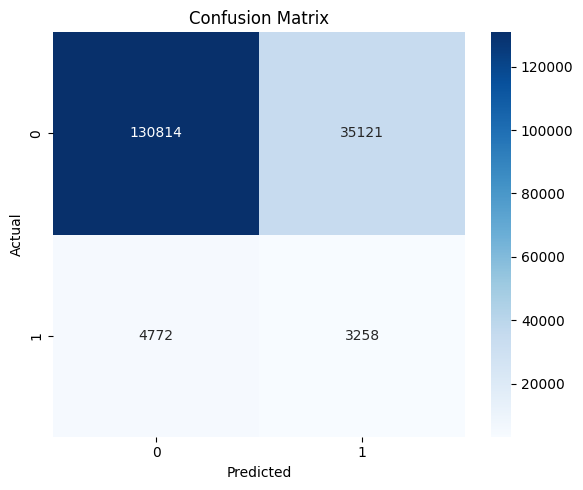

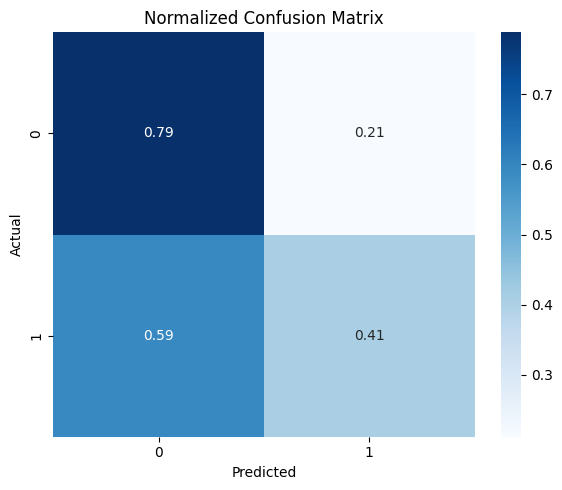

In [95]:
# Step 1: Preprocess X_train first (only features)
feature_pipeline_oversampler = Pipeline([
    ('artist_encoder', ArtistPopularityEncoder()),
    ("data_cleaner", DataCleaner()),
    ('encoder', SafeOneHotEncoder(columns=['genre', 'key', 'time_signature'])),
    
])

full_pipeline_oversampled = Pipeline([
    ("preprocessing", feature_pipeline_oversampler),
    ("classifier", LogisticRegression(random_state=42))
])

X_train_preprocessed = feature_pipeline_oversampler.fit_transform(X_train, y_train)

# Step 2: Oversample preprocessed features
oversampler = OversampleMinority(target_minority_percentage=0.4)
X_resampled, y_resampled = oversampler.fit(X_train_preprocessed, y_train).transform(X_train_preprocessed, y_train)

# Step 3: Fit full pipeline (with classifier) using resampled data
# Since the preprocessing is already done, we only need the classifier
# So we extract just the classifier step from the full_pipeline
classifier = full_pipeline_oversampled.named_steps["classifier"]
classifier.fit(X_resampled, y_resampled)

# Step 4: Evaluate on validation set (apply full pipeline)
# Optionally refit full pipeline if you want it complete:
model_with_oversampling = Pipeline([
    ("preprocessing", feature_pipeline_oversampler),
    ("classifier", classifier)
])

# Evaluate using model_with_oversampling
evaluator = ModelEvaluator(model_with_oversampling, X_val, y_val)
evaluator.evaluate()


/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linea

Running evaluation...

Accuracy: 0.5415

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.53      0.69    165935
           1       0.07      0.72      0.13      8030

    accuracy                           0.54    173965
   macro avg       0.52      0.63      0.41    173965
weighted avg       0.93      0.54      0.66    173965



/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203:

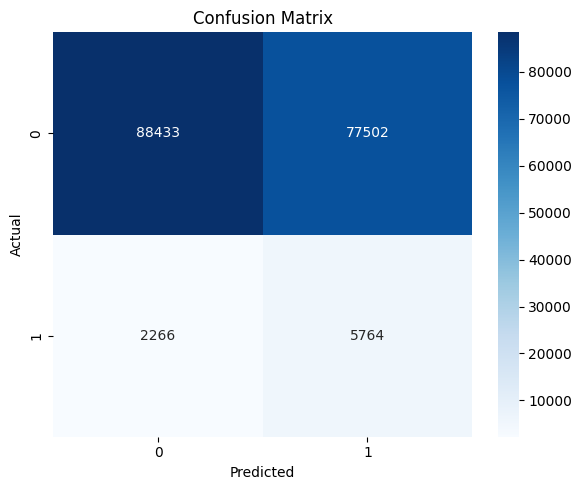

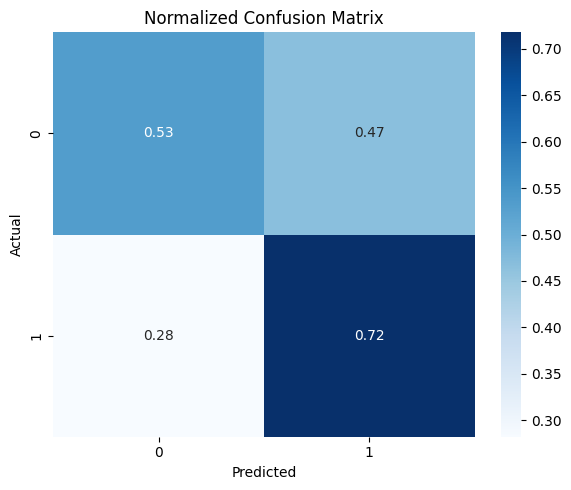

In [102]:
# Step 1: Preprocess X_train first (only features)
feature_pipeline_undersampler = Pipeline([
    ('artist_encoder', ArtistPopularityEncoder()),
    ("data_cleaner", DataCleaner()),
    ('encoder', SafeOneHotEncoder(columns=['genre', 'key', 'time_signature'])),
    
])

full_pipeline_undersampled = Pipeline([
    ("preprocessing", feature_pipeline_undersampler),
    ("classifier", LogisticRegression(random_state=42))
])

X_train_preprocessed = feature_pipeline_undersampler.fit_transform(X_train, y_train)

# Step 2: Undersampler preprocessed features
undersampler = UndersampleMajority(target_minority_percentage=0.5)
X_resampled, y_resampled = undersampler.fit(X_train_preprocessed, y_train).transform(X_train_preprocessed, y_train)

# Step 3: Fit full pipeline (with classifier) using resampled data
# Since the preprocessing is already done, we only need the classifier
# So we extract just the classifier step from the full_pipeline
classifier = full_pipeline_oversampled.named_steps["classifier"]
classifier.fit(X_resampled, y_resampled)

# Step 4: Evaluate on validation set (apply full pipeline)
# Optionally refit full pipeline if you want it complete:
model_with_oversampling = Pipeline([
    ("preprocessing", feature_pipeline_undersampler),
    ("classifier", classifier)
])

# Evaluate using model_with_oversampling
evaluator = ModelEvaluator(model_with_oversampling, X_val, y_val)
evaluator.evaluate()


/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linea

Running evaluation...

Accuracy: 0.5244

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.51      0.67    165935
           1       0.07      0.74      0.13      8030

    accuracy                           0.52    173965
   macro avg       0.52      0.63      0.40    173965
weighted avg       0.93      0.52      0.65    173965



/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/level3/mlops_spotify/spotify-1million/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203:

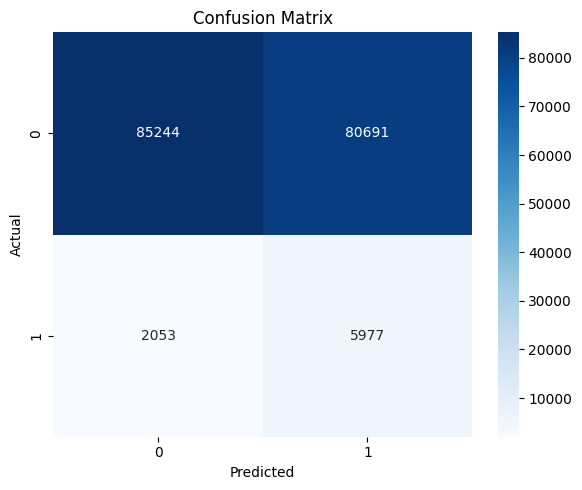

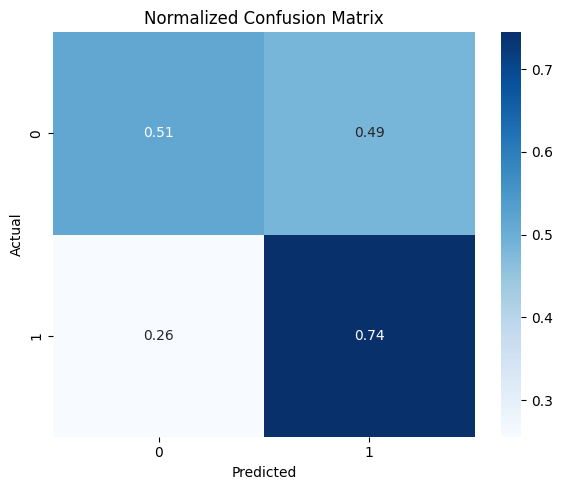

In [107]:


# Step 1: Preprocess X_train first (only features)
feature_pipeline_balanced = Pipeline([
    ('artist_encoder', ArtistPopularityEncoder()),
    ("data_cleaner", DataCleaner()),
    ('encoder', SafeOneHotEncoder(columns=['genre', 'key', 'time_signature'])),
    
])

full_pipeline_balanced = Pipeline([
    ("preprocessing", feature_pipeline_balanced),
    ("classifier", LogisticRegression(random_state=42))
])

X_train_preprocessed = feature_pipeline_balanced.fit_transform(X_train, y_train)

# Step 2: Undersampler preprocessed features
balancer = BalancedResampler()
X_train_balanced, y_train_balanced = balancer.transform((X_train_preprocessed, y_train))


# Step 3: Fit full pipeline (with classifier) using resampled data
# Since the preprocessing is already done, we only need the classifier
# So we extract just the classifier step from the full_pipeline
classifier = full_pipeline_balanced.named_steps["classifier"]
classifier.fit(X_train_balanced, y_train_balanced)

# Step 4: Evaluate on validation set (apply full pipeline)
# Optionally refit full pipeline if you want it complete:
model_with_oversampling = Pipeline([
    ("preprocessing", feature_pipeline_undersampler),
    ("classifier", classifier)
])

# Evaluate using model_with_oversampling
evaluator = ModelEvaluator(model_with_oversampling, X_val, y_val)
evaluator.evaluate()


In [96]:




# Step 1: Preprocess X_train first (only features)
feature_pipeline_undersampler = Pipeline([
    ("data_cleaner", DataCleaner()),
    ("string_encoder", StringToIntEncoder(columns_to_encode=['artist_name', 'genre'])),
])

full_pipeline_undersampled = Pipeline([
    ("preprocessing", feature_pipeline_undersampler),
    ("classifier", LogisticRegression(random_state=42))
])

X_train_preprocessed = feature_pipeline_undersampler.fit_transform(X_train)

# Step 2: Oversample preprocessed features
undersampler = UndersampleMajority(target_minority_percentage=0.3)
X_resampled, y_resampled = undersampler.fit(X_train_preprocessed, y_train).transform(X_train_preprocessed, y_train)

# Step 3: Fit full pipeline (with classifier) using resampled data
# Since the preprocessing is already done, we only need the classifier
# So we extract just the classifier step from the full_pipeline
classifier = full_pipeline_undersampled.named_steps["classifier"]
classifier.fit(X_resampled, y_resampled)

# Step 4: Evaluate on validation set (apply full pipeline)
# Optionally refit full pipeline if you want it complete:
model_with_oversampling = Pipeline([
    ("preprocessing", feature_pipeline_undersampler),
    ("classifier", classifier)
])

# Evaluate using model_with_oversampling
evaluator = ModelEvaluator(model_with_oversampling, X_val, y_val)
evaluator.evaluate()


In [ ]:
X_resampled.shape

In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Step 3: Train your model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

In [52]:

df_cleaned = DataCleaner().fit(X, y).transform(X)
df_preprossed = StringToIntEncoder(['artist_name', 'genre']).fit(df_cleaned, y).transform(df_cleaned)

X_train, X_val, X_test, y_train, y_val, y_test = split_data(df_preprossed, y)

undersampler = UndersampleMajority(target_minority_percentage=0.3)
X_resampled, y_resampled = undersampler.fit(X_train, y_train).transform(X_train, y_train)

In [53]:
# Step 3: Train your model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

ValueError: could not convert string to float: 'Danakil'

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

In [ ]:
balancer = BalancedResampler()
X_train_balanced, y_train_balanced = balancer.transform((X_train, y_train))


In [ ]:
# Step 3: Train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

In [ ]:
y_pred = model.predict(X_val)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# ### Anomaly detection

In [ ]:
from sklearn.svm import OneClassSVM

# Train only on majority class
X_train_majority = X_train[y_train == 0]

oc_svm = OneClassSVM(kernel="rbf", gamma=0.01, nu=0.05)
oc_svm.fit(X_train_majority)

# Predict: -1 = anomaly (class 1), 1 = normal (class 0)
y_pred = oc_svm.predict(X_val)
y_pred = np.where(y_pred == -1, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train_resampled)

y_pred = iso_forest.predict(X_val)
y_pred = np.where(y_pred == -1, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))
